In [39]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import seaborn as sns
sns.set_style("whitegrid")
# Bigger font
sns.set_context("poster")
# Figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 3
np.random.seed(123)

## PREPROCESSING

## 1. Tree-based models

- Tree-based models **don't need scaling**.
- Tree-based models **robust to outliers**.

## 2. Non-tree-based models

Ways to preprocess data:

### a. Scaling 
- Standardization (or Z-score normalization)
- Min-Max Scaler (or Normalization)
- Robust Scaler

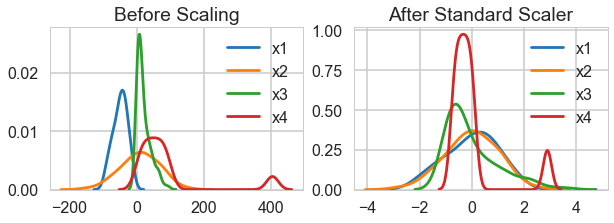

In [71]:
from sklearn import preprocessing
import sklearn.utils
X = {
    'x1':sklearn.utils.shuffle(np.random.normal(-50,20,100)),
    'x2':sklearn.utils.shuffle(np.random.normal(10,60,100)),
    'x3':sklearn.utils.shuffle(np.random.exponential(20,100)),
    'x4':sklearn.utils.shuffle(np.concatenate((np.linspace(0,100,90), np.linspace(400,410,10))))
    }
df = pd.DataFrame(X)

scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns.values)

fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)
sns.kdeplot(df['x4'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)
sns.kdeplot(scaled_df['x4'], ax=ax2)
plt.show()

### b. Manage Outliers
#### b.1. Winsorization: Clip feature values between a lower and upper bound.
    
    
Outliers can affect a model drastically, so windorization is a way to eliminate those outliers.

![](images/linearmodel_outlier.png)

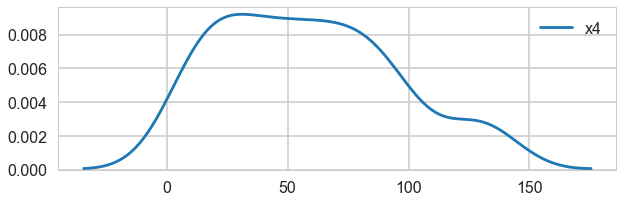

In [75]:
UPPERBOUND, LOWERBOUND = np.percentile(df['x4'], [10,90])
clipped = np.clip(df['x4'], UPPERBOUND, LOWERBOUND)
ax = sns.kdeplot(clipped)

#### b.2. Rank:

It assigns ranks to data, starting with 1.

- It sets spaces between values to be equal.
- It can be a better option that min-max.

In [67]:
from scipy.stats import rankdata
rankdata([1000, -1, 10])

array([3., 1., 2.])

Rank will simply map indices to each feature element.

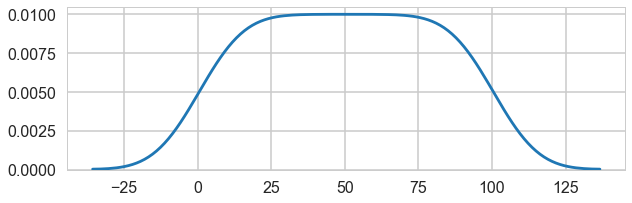

In [73]:
ax = sns.kdeplot(rankdata(df['x4']))

It moves outliers closer the rest of the data. However, I don't see why it is positive to lose distance between values if it is not an ordinal feature (I will need to try this with real data).

### c. Data Transformation

Data transformations are specially useful in Linear Models, KNN, NNs can benefit from this.

These transformations drive too big values closer to the feature's average value.

- Log transform

$$ x_{new} = \log(x + 1)$$

- Square root

$$ x_{new} = \sqrt{x}$$

## FEATURE GENERATION

Process of creating new features using knowledge of the features and the tasks.

It makes the model training more simple (like in GBDT where it can reduce the number of trees) and effective.

We can engineer these features using
- Prior knowledge and logic
- Dig into the data, create, and check hypotheses (EDA = Exploratory Data Analysis)

#### a. Ratios

For example:

- Squared area: $55 m^2$  
- Price: $\$ 107000$

Generated feature:
- Price for $m^2$: $ 107000 / 55$

#### b. Combination of features

We can add a feature that shows a direct distance.

![](images/combined.png)

#### c. Fractional part

If we have prices of products as a feature, the **fractional part** can be a feature.

This can help the model utilize the difference in people's perception of these prices.

![](images/fraction.png)

Some interesting facts that might give one an idea about when to generate this type of feature.
- In auctions, people tend to set round numbers as prices.
- No human will do something with an exact interval of one second.